# Data Analysis

#### Importing libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

#### Importing Data frame

In [27]:
data = pd.read_csv("BDS.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Algorithm  180 non-null    object 
 1   Size       180 non-null    int64  
 2   Time       180 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.3+ KB


,Algorithm,Size,Time
0,QuickSortI,1000,0.000109
1,QuickSortI,1000,0.000090
2,QuickSortI,1000,0.000050
3,QuickSortI,1000,0.000031
4,QuickSortI,1000,0.000026


#### Partitioning the data

In [28]:
algorithms = ["QuickSortI", "QuickSortR"]
sizes = [1000, 10000, 100000]
means = data.groupby(['Algorithm', 'Size'])['Time'].mean().unstack()
means

Size,1000,10000,100000
Algorithm,,,
QuickSortI,0.000047,0.001040,0.008882
QuickSortR,0.000032,0.000895,0.009426


#### Bar graphs

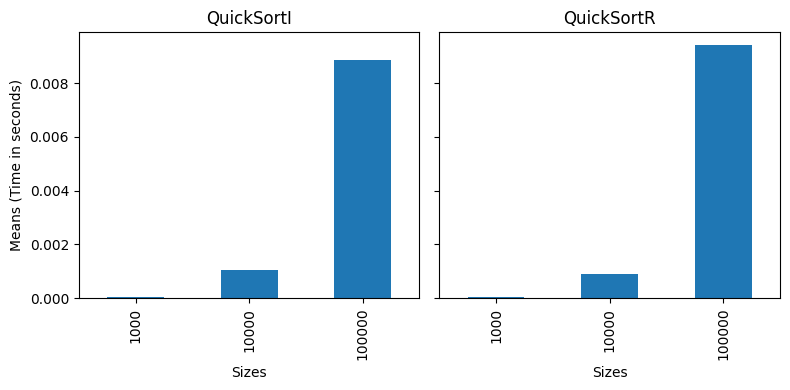

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=len(algorithms), figsize=(8, 4), sharey=True)

for ax, algorithm in zip(axes, algorithms):
    y_values = means.loc[algorithm]
    y_values.plot(kind='bar', ax=ax, width=0.5)

    ax.set_ylabel('Means (Time in seconds)')
    ax.set_xlabel('Sizes')
    ax.set_title(algorithm)
    ax.set_xticks(range(len(sizes)))
    ax.set_xticklabels(sizes)

plt.tight_layout()
plt.show()